In [1]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix,graycoprops
import pandas as pd
import cv2

In [2]:
slices=[]
proList = ['contrast', 'homogeneity', 'ASM', 'energy']
featlist = ['sumValue','contrast', 'homogeneity', 'ASM', 'energy','hue', 'saturaton', 'value','label']
properties =np.zeros(5)
glcmMatrix = []
final=[]
folders = ["Skala0","Skala1","Skala2","Skala3","Skala4"]

Skala0
0
Skala1
1
Skala2
2
Skala3
3
Skala4
4
150


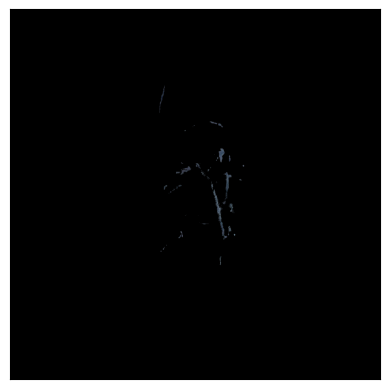

In [3]:
for folder in folders:
    print(folder)
    labell=folders.index(folder)
    print(labell)
    INPUT_SCAN_FOLDER="C:/Users/ASUS/OneDrive/Documents/SKRIPSI/skripsiu/Dataset/"+folder+"/"

    image_folder_list = os.listdir(INPUT_SCAN_FOLDER)
#     print(image_folder_list)

    for i in range(len(image_folder_list)):

        abc =cv2.imread(INPUT_SCAN_FOLDER+image_folder_list[i])
        dim = (1000, 1000)
        resized = cv2.resize(abc, dim, interpolation = cv2.INTER_AREA)
        #print('Resized Dimensions : ',resized.shape)

        gray_image = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)
        
        lower_red = np.array([5,50, 50]) # ini nilainya darimana? buat apa?, i mean [5, 50, 50] apa?
        upper_red  = np.array([20,255,255]) # ini juga sama nilainya darimana, buat apa? i mean [20, 255, 255] apa?
        mask = cv2.inRange(hsv, lower_red, upper_red)
        res = cv2.bitwise_and(resized, resized, mask=mask)
        # plt.imshow(res, cmap='Blues', interpolation = 'bicubic')
        plt.imshow(res)
        plt.xticks([]),plt.yticks([])

        
        sum=0
        result=res.flatten()
        #print(len(result))
        for k in range(3072):
            sum+=result[k]^2
        #print(sum)
        sqsum=math.sqrt(sum)
        #print(sqsum)

        h,s,v = cv2.split(hsv)

        h_mean = np.mean(h)
        s_mean = np.mean(s)
        v_mean = np.mean(v)

        glcmMatrix = (graycomatrix(gray_image, [1], [0], levels=2 ** 8))
        
        for j in range(0, len(proList)):
            properties[j] = (graycoprops(glcmMatrix, prop=proList[j]))

        # print(properties)

        features =np.array([sqsum, properties[0], properties[1], properties[2], properties[3], h_mean, s_mean, v_mean, labell])
        final.append(features)
print(len(final))


In [4]:
print(sqsum)

78.38367176906169


In [5]:
df = pd.DataFrame(final, columns=featlist)
df.to_csv("feature_dataset_1000px.csv")
s=pd.read_csv("feature_dataset_1000px.csv")
# for i in s.iterrows():
#      print(i)

In [6]:
import pandas as pd
df = pd.read_csv('feature_dataset_1000px.csv', index_col=0)
df.head()

sumValue   contrast  homogeneity       ASM    energy         hue  \
0  78.383672  16.656466     0.938295  0.037338  0.193229  102.019578   
1  78.383672  21.848998     0.916269  0.041866  0.204611  107.860592   
2  78.383672  21.972524     0.914382  0.026455  0.162651  107.707690   
3  78.383672  53.700932     0.906272  0.058693  0.242267  111.507190   
4  78.383672  21.086079     0.905031  0.041597  0.203954  108.038949   

   saturaton       value  label  
0   6.076716  239.601118    0.0  
1  49.071800  219.021018    0.0  
2  42.995309  214.469718    0.0  
3  21.193654  218.849183    0.0  
4  60.611979  215.771037    0.0